In [207]:
!pip install opencv-python

In [208]:
import cv2

In [209]:
img = cv2.imread(r'img3.jpg')

In [210]:
img.shape

(400, 640, 3)

In [211]:
img[0]

array([[252, 238, 219],
       [252, 238, 219],
       [252, 238, 219],
       ...,
       [212, 221, 235],
       [210, 219, 233],
       [208, 217, 231]], dtype=uint8)

In [212]:
import matplotlib.pyplot as plt

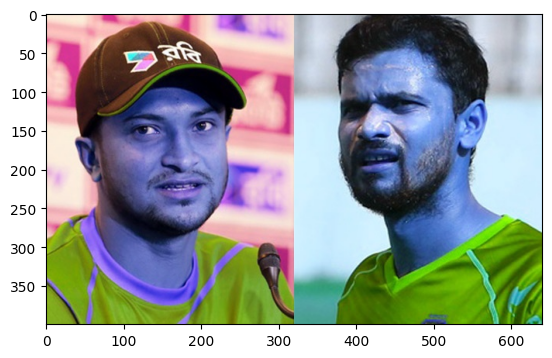

In [213]:
plt.imshow(img)

In [214]:
from google.colab.patches import cv2_imshow

In [215]:
haar_data = cv2.CascadeClassifier(r'data.xml')

In [216]:
haar_data.detectMultiScale(img)

array([[342,  50, 179, 179],
       [ 83,  84, 169, 169]], dtype=int32)

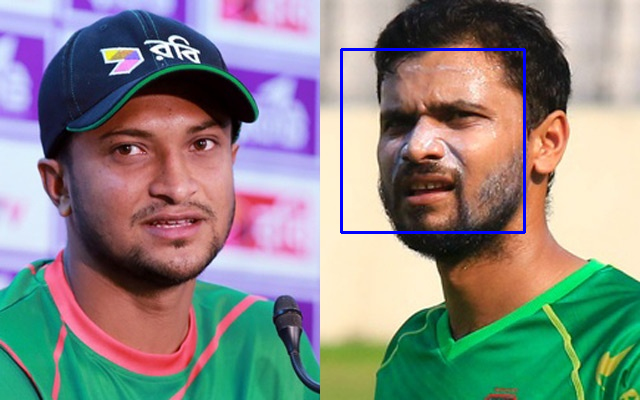

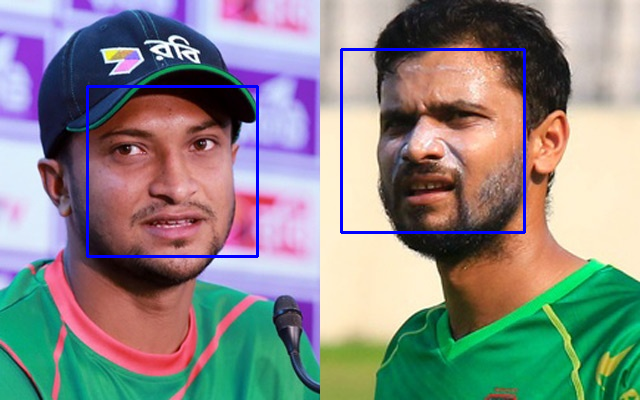

In [217]:


faces = haar_data.detectMultiScale(img, 1.3, 5)


for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv2_imshow(img)
cv2.destroyAllWindows()


In [218]:
capture = cv2.VideoCapture('video.mp4')
data = []
while True :
    flag,img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
    else:
        print('error')
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w , y+h),(255,0,255),4)
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face,(50,50))
        print(len(data))
        # cv2_imshow(img)
        if len(data) < 100:
            data.append(face)

    if len(data)>=100:
        break

capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [219]:
import numpy as np

In [220]:
x = np.array([3,2,54,6])

In [221]:
x

array([ 3,  2, 54,  6])

In [222]:
x[0:2]

array([3, 2])

In [223]:
x = np.array([[3,4,54,67,8,8],[1,2,2,4,5,7],[4,5,3,5,6,7],[1,2,3,34,6,8]])

In [224]:
x

array([[ 3,  4, 54, 67,  8,  8],
       [ 1,  2,  2,  4,  5,  7],
       [ 4,  5,  3,  5,  6,  7],
       [ 1,  2,  3, 34,  6,  8]])

In [225]:
x[0]

array([ 3,  4, 54, 67,  8,  8])

In [226]:
x[0][1:4]

array([ 4, 54, 67])

In [227]:
#x[row,col]
x[0:3,0:3]

array([[ 3,  4, 54],
       [ 1,  2,  2],
       [ 4,  5,  3]])

In [228]:
x[:,1:4]

array([[ 4, 54, 67],
       [ 2,  2,  4],
       [ 5,  3,  5],
       [ 2,  3, 34]])

In [229]:
np.save('without_mask.npy',data)

In [230]:
np.save('with_mask.npy',data)

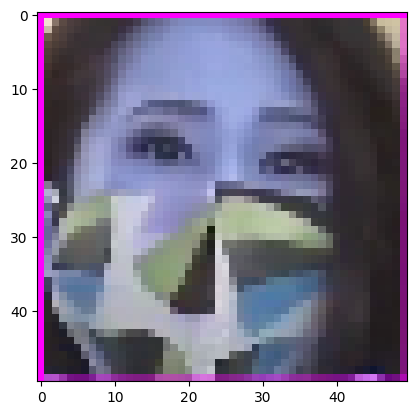

In [231]:
plt.imshow(data[50])

In [232]:
with_mask=np.load('with_mask.npy')
without_mask=np.load('without_mask.npy')

In [233]:
with_mask.shape

(100, 50, 50, 3)

In [234]:
without_mask.shape

(100, 50, 50, 3)

In [235]:
with_mask = with_mask.reshape(100,50 * 50* 3)
without_mask = without_mask.reshape(100,50 * 50* 3)

In [236]:
np.shape(with_mask)

(100, 7500)

In [237]:
without_mask.shape

(100, 7500)

In [238]:
 X = np.r_[with_mask,without_mask]

In [239]:
X.shape

(200, 7500)

In [240]:
labels = np.zeros(X.shape[0])

In [241]:
labels[100:] = 1.0

In [242]:
names = {0:'Mask', 1: 'No Mask'}

In [243]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [244]:
x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size=0.25)

In [245]:
np.shape(x_train)

(150, 7500)

In [246]:
from sklearn.decomposition import PCA

In [247]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)

In [248]:
x_train[0]

array([-2569.09634171,  -417.05193782])

In [249]:
np.shape(y_train)

(150,)

In [250]:
x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size=0.20)

In [251]:
labels = np.unique(y)
print(labels)

[109]


In [252]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [253]:
#x_test = pca.transform(x_test)
y_pred= svm.predict(x_test)

In [254]:
accuracy_score(y_test,y_pred)

0.3

In [255]:
haar_data = cv2.CascadeClassifier(r'data.xml')
capture = cv2.VideoCapture('video.mp4')

cnt=0
while True :
    flag,img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
    else:
        print('error')
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w , y+h),(255,0,255),4)
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face,(50,50))
        face = face.reshape(1, -1)
        pred = svm.predict(face)[0]
        n = names[int(pred)]
        print(n)
        cv2_imshow(img)
        cnt=cnt+1

    if cnt>=99:
        break

capture.release()
cv2.destroyAllWindows()

No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
Mask
Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
